In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Part 1

In [2]:
csv_file = "/Users/robertjost/Fall_2025/Biogeochemistry/dust_dataHW1.csv"

In [ ]:
# concentration is g / ml, flux is g / m^2 / yr. g = mg/1000

dust_df = pd.read_csv(csv_file)


Convert P and Ca concentrations from mg * L-1 to g * m-3, which ends up being a one-to-one conversion. Then convert the concentration to kg m-3. Finally divide the concentration with an assumed density of water to be 1e6 kg m-3.

In [ ]:

dust_df["P_flux"] = (dust_df["P_conc"] /1000000) * dust_df["flux_gm2yr"]
dust_df["Ca_flux"] = (dust_df["Ca_conc"] /1000000) * dust_df["flux_gm2yr"]

In [69]:
# sort the dataframe according to the elevation gradient of the ecosystems
elevation_gradient = ["Plains", "Foothills", "Montane", "Subalpine", "Alpine"]

dust_df["Ecosystem"] = pd.Categorical(dust_df["Ecosystem"], categories=elevation_gradient, ordered=True)
dust_df_sorted = dust_df.sort_values(["Ecosystem", "Season"])
dust_df_sorted

,ID,Ecosystem,Season,P_conc,Ca_conc,flux_gm2yr,P_flux,Ca_flux
7,8,Plains,JAS,2007.50,9701.5,14.282538,0.028672,0.138562
4,5,Plains,MJ,2417.95,8247.0,15.986543,0.038655,0.131841
2,3,Foothills,FMA,1134.00,9418.0,6.999662,0.007938,0.065923
8,9,Foothills,JAS,2652.00,8372.5,9.707827,0.025745,0.081279
5,6,Foothills,MJ,3245.30,5843.0,21.734655,0.070535,0.126996
0,1,Foothills,NDJ,1028.00,10861.0,5.307173,0.005456,0.057641
3,4,Montane,FMA,1235.50,8839.5,7.370548,0.009106,0.065152
9,10,Montane,JAS,2813.00,7236.5,10.445604,0.029383,0.075590
6,7,Montane,MJ,3558.50,4760.5,12.983546,0.046202,0.061808
1,2,Montane,NDJ,778.00,7455.0,8.608287,0.006697,0.064175


In [45]:
seasons = dust_df.groupby("Season", observed=True)
ecosystem = dust_df.groupby("Ecosystem", observed=True)

In [ ]:
# Plotting variables
marker_types = ['o', 's', '^', 'D', 'v']
season_order = ["NDJ", "FMA", "MJ", "JAS"]
font_labels = {'family': 'Arial', 'color': 'black', 'size': 14}
font_titles = {'family': 'Arial', 'color': 'black', 'size': 16}
# grouped bar chart
bar_width = 0.15
x = np.arange(len(season_order))

In [67]:
# Figure captions
P_caption = "Figure 1. Annual Phosphorous Flux by Season for each ecosystem."
Ca_caption = "Figure 2. Annual Calcium Flux by Season for each ecosystem."

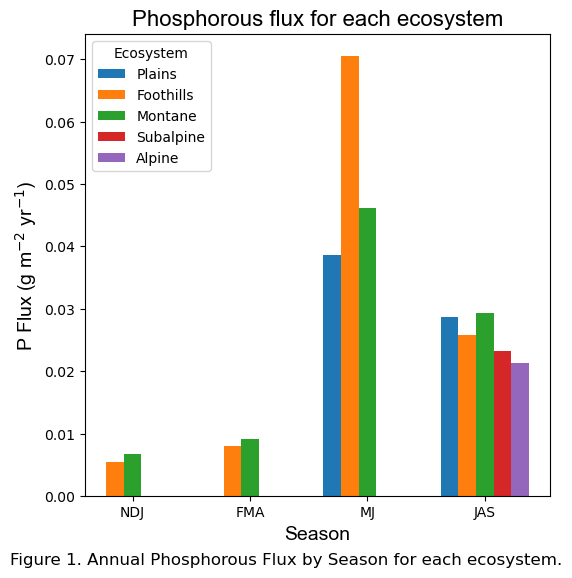

In [68]:
# Grouped bar chart for P
plt.figure(figsize=(6,6))
for idx, (name, group) in enumerate(ecosystem):
    group = group.set_index("Season").reindex(season_order).reset_index()
    plt.bar(x + idx * bar_width, group["P_flux"], width=bar_width, label=name)

plt.xlabel("Season", fontdict=font_labels)
plt.ylabel("P Flux (g m$^{-2}$ yr$^{-1}$)", fontdict=font_labels)
plt.title("Phosphorous flux for each ecosystem", fontdict=font_titles)
plt.xticks(x + bar_width * (len(list(ecosystem)) - 1) / 2, season_order)
plt.legend(title="Ecosystem", loc="upper left")
plt.figtext(0, -0.005, P_caption, ha="left", fontsize=12)
plt.show()

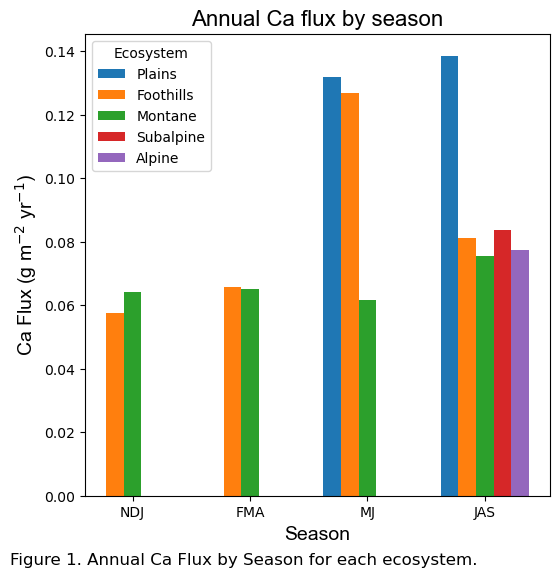

In [ ]:
# Grouped bar chart for Ca
plt.figure(figsize=(6,6))
for idx, (name, group) in enumerate(ecosystem):
    group = group.set_index("Season").reindex(season_order).reset_index()
    plt.bar(x + idx * bar_width, group["Ca_flux"], width=bar_width, label=name)

plt.xlabel("Season", fontdict=font_labels)
plt.ylabel("Ca Flux (g m$^{-2}$ yr$^{-1}$)", fontdict=font_labels)
plt.title("Calcium flux for each ecosystem", fontdict=font_titles)
plt.xticks(x + bar_width * (len(list(ecosystem)) - 1) / 2, season_order)
plt.legend(title="Ecosystem", loc="upper left")
plt.figtext(0, -0.005, Ca_caption, ha="left", fontsize=12)
plt.show()

# Part 2

In [86]:
from IPython.display import display, Markdown
p_out = 1e-1 / 1e4
p_in = 2.3e-2 / 1e3
a_ws = 1e1 * 1e6

delta_p = a_ws * (p_in - p_out)
md_str = (f"The net change in Phosphorpous for this watershed is {delta_p} kg.")
display(Markdown(md_str))

The net change in Phosphorpous for this watershed is 130.0 kg.